# Instalación de librerías necesarias

In [ ]:
!pip install transformers datasets evaluate accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Cargar Dataset y modelo


The INBio's species records database has the following fields:
 The field are:
  - "scientific_name",
  - "full_description_unstructured", "reproduction_unstructure",
  - "scientific_name_authorship",    "name_published_in_year",
  - "common_names_unstructured",     "synonyms",
  - "full_description_unstructured", "molecular_data_unstructure",
  - "cr_distribution",               "regional_distribution",
  - "annual_cycles_unstructure",     "collecting_method",
  - "uses_unstructure",              "myths",
  - "life_cycle_unstructure",        "interaction_unstructure",
  - "life_form_unstructure",         "population_biology_unstructure",
  - "demography_unstructure",        "threat_unstructure",
  - "habitat_unstructure",           "territory_unstructure",
  - "feeding_unstructure",           "captiondistributionmap",
  - "phenology_unstructure",         "conservationareadistribution",
  - "behavior_unstructure",          "threat_status",
  - "wild_protected_area_distribution",  "etymology",
  - "interaction_unstructured",      "brief_description",
  - "legislation_unstructured",      "management_and_conservation_unstructured"

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
""" The csv has the following struture:

# taxon_record_id NUMERIC: species page id at INBio database.
# kingdom TEXT: kingdom name form INBios Taxon table.
# default_name TEXT: Scientific name.
# description TEXT: Species description
# description_type TEXT: Description type. The name of the descrotion field at
#         INBios database.
"""
import pandas as pd
def read_species_data(path):
    """
    Reads INBio data that is available in a csv file.
    :param url: url where the data is available.
    """
    df = pd.read_csv(path, sep = '|')
    return df

In [ ]:
path = "/gdrive/MyDrive/RAG Maria/reg_especies_INBiov5.csv"
df_especies = read_species_data(path)

In [ ]:
df_especies.head()

,taxon_record_id,kingdom,default_name,description,description_type
0,1653.0,Animalia,Transandinomys talamancae,Ratón o rata de monte,common_names
1,1656.0,Animalia,Tanyuromys aphrastus,Ratón de monte,common_names
2,1553.0,animalia,Dermanura azteca,Murciélago,common_names
3,3037.0,animalia,Eupsittula pertinax,Perico carisucio,common_names
4,3032.0,animalia,Leptotrygon veraguensis,Paloma-perdiz bigotiblanca,common_names


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Limpieza básica: eliminar filas con descripciones vacías y duplicados exactos
df = df_especies.dropna(subset=['description']).drop_duplicates(subset=['description'])

# Crear codificador numérico para las clases
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['description_type'])

# Dividir en train (80%) y temporal (20%) manteniendo texto + etiquetas
train_df, temp_df = train_test_split(
    df[['description', 'label']],  # Texto y etiqueta numérica
    test_size=0.2,
    stratify=df['description_type'],  # Estratificación por clase original
    random_state=42
)

# Dividir temporal en validación (10%) y test (10% del total original)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['label'],  # Estratificación por etiqueta numérica
    random_state=42
)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapeo de clases:", class_mapping)

Mapeo de clases: {' life_cycle': np.int64(0), ' life_form': np.int64(1), 'annual_cycles': np.int64(2), 'behavior': np.int64(3), 'collecting_method': np.int64(4), 'common_names': np.int64(5), 'conservation_area_distribution': np.int64(6), 'cr_distribution': np.int64(7), 'demography': np.int64(8), 'feeding': np.int64(9), 'full_description': np.int64(10), 'habitat': np.int64(11), 'interaction': np.int64(12), 'myths': np.int64(13), 'phenology': np.int64(14), 'population_biology': np.int64(15), 'regional_distribution': np.int64(16), 'reproduction': np.int64(17), 'synonyms': np.int64(18), 'territory': np.int64(19), 'threat': np.int64(20), 'uses': np.int64(21), 'wild_protected_area': np.int64(22)}


In [ ]:
#buscar en train_df cuantos description_type hay
train_df.head()

,description,label
0,"Delfín manchado, pintado o moteado, delfín man...",5
1,"Dosel, visitan cebos de frutas colocados en el...",11
2,"Sylvia elata Latham, 1790.",18
3,Diagnosis del machoLongitud del cuerpo de 8 a ...,10
4,Amistad PacificoGuanacasteOsaPacifico CentralT...,6


In [ ]:
# vemos cuantos valores hay por cada etiqueta para ver si estan balanceadas
train_df['label'].value_counts().sort_index()

In [ ]:
val_df["label"].value_counts().sort_index()

In [ ]:
test_df["label"].value_counts().sort_index()

In [ ]:
# creamos un grafico que me muestre cuantos datos hay por etiquetas en train_df
import seaborn as sns
sns.countplot(x='label', data=train_df)

In [ ]:
# creamos un grafico que me muestre cuantos datos hay por etiquetas en valid_df
import seaborn as sns
sns.countplot(x='label', data=val_df)

In [ ]:
# creamos un grafico que me muestre cuantos datos hay por etiquetas en test_df
import seaborn as sns
sns.countplot(x='label', data=test_df)

## Para evitar el desbalance de clases vamos a utilizar solamente la cantidad de la etiqueta 5 de train, test y validation que son los que menos tienen:
#AHORA NO LO VAMOS A HACER

- train: 572
- validation: 81
- test: 66

In [ ]:
train_df = train_df.groupby('label').apply(lambda x: x.sample(572)).reset_index(drop=True)
valid_df = val_df.groupby('label').apply(lambda x: x.sample(81)).reset_index(drop=True)
test_df = test_df.groupby('label').apply(lambda x: x.sample(66)).reset_index(drop=True)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
train_df["label"].value_counts()

,count
label,
0,572
1,572
2,572
3,572
4,572
5,572


In [ ]:
valid_df["label"].value_counts()

,count
label,
0,81
1,81
2,81
3,81
4,81
5,81


In [ ]:
test_df["label"].value_counts()

,count
label,
0,66
1,66
2,66
3,66
4,66
5,66


# Tokenización

### Vamos a crear una funcion para realizar el proceso de tokenizacion de los datos y devolver las mascaras de atencion y los inpuds_ids de cada texto

In [ ]:
def encode(texts):
    """
    Esta funcion tokeniza los textos y devuelve las mascaras de atencion y los inpuds_ids de cada texto
    """

    encoded_dict = tokenizer(
        texts,
        truncation=True,
        max_length=512,
        padding = "max_length",
        return_tensors="pt",
        return_attention_mask=True
    )

    return encoded_dict["input_ids"], encoded_dict["attention_mask"]

In [ ]:
train_inputs_ids, train_attention_mask = encode(train_df["description"].values.tolist())
valid_inputs_ids, valid_attention_mask = encode(val_df["description"].values.tolist())
test_inputs_ids, test_attention_mask = encode(test_df["description"].values.tolist())

# Creación de los DataLoaders para el fine-tuning del modelo

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 16

train_data = TensorDataset(train_inputs_ids, train_attention_mask, torch.tensor(train_df["label"].values))
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

valid_data = TensorDataset(valid_inputs_ids, valid_attention_mask, torch.tensor(val_df["label"].values))
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=batch_size)

test_data = TensorDataset(test_inputs_ids, test_attention_mask, torch.tensor(test_df["label"].values))
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# Definición del modelo y los labels a clasificar

In [ ]:
from transformers import RobertaForSequenceClassification

num_labels = train_df["label"].nunique()
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
num_labels

23

# Fine-tuning

## Definir Optimizador y Scheduler

In [ ]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

EPOCHS = 15
LEARNING_RATE = 2e-6

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(
                    optimizer,
                    num_warmup_steps=0,
                    num_training_steps=len(train_dataloader)*EPOCHS
            )

## Entrenamiento

In [ ]:
import torch

# Configuración de Early Stopping
PATIENCE = 3  # Número de épocas sin mejora antes de parar
BEST_MODEL_PATH = 'best_model.pth'  # Ruta para guardar el mejor modelo

# Inicializar variables de Early Stopping
best_val_loss = float('inf')
patience_counter = 0

In [ ]:
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import numpy as np
import math

train_loss_per_epoch = []
val_loss_per_epoch = []
train_accuracy_per_epoch = []
val_accuracy_per_epoch = []

for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)

    # Fase de entrenamiento (sin cambios)
    model.train()
    train_loss = 0
    train_correct = 0
    train_total = 0

    for step_num, batch_data in enumerate(tqdm(train_dataloader, desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids=input_ids, attention_mask=att_mask, labels=labels)

        loss = output.loss
        train_loss += loss.item()

        # Cálculo de accuracy
        logits = output.logits
        preds = np.argmax(logits.cpu().detach().numpy(), axis=-1)
        labels_cpu = labels.cpu().numpy()
        train_correct += (preds == labels_cpu).sum()
        train_total += labels.size(0)

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    # Métricas de entrenamiento (sin cambios)
    train_loss = train_loss / (step_num + 1)
    train_acc = train_correct / train_total
    train_loss_per_epoch.append(train_loss)
    train_accuracy_per_epoch.append(train_acc)

    # Fase de validación (sin cambios)
    model.eval()
    valid_loss = 0
    valid_pred = []
    valid_true = []

    with torch.no_grad():
        for step_num_e, batch_data in enumerate(tqdm(valid_dataloader, desc='Validation')):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model(input_ids=input_ids, attention_mask=att_mask, labels=labels)

            loss = output.loss
            valid_loss += loss.item()

            # Almacenar predicciones y verdaderas etiquetas
            logits = output.logits.cpu().detach().numpy()
            valid_pred.append(np.argmax(logits, axis=-1))
            valid_true.append(labels.cpu().numpy())

    # Métricas de validación (sin cambios)
    valid_loss = valid_loss / (step_num_e + 1)
    valid_pred = np.concatenate(valid_pred)
    valid_true = np.concatenate(valid_true)
    val_acc = (valid_pred == valid_true).mean()

    val_loss_per_epoch.append(valid_loss)
    val_accuracy_per_epoch.append(val_acc)

    # Mensaje con métricas (sin cambios)
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {valid_loss:.4f} | Val Acc: {val_acc:.4f}")
    print('-' * 50)

    # Early Stopping y guardado del mejor modelo
    if valid_loss < best_val_loss:
        print(f"Val loss mejoró de {best_val_loss:.4f} a {valid_loss:.4f}. Guardando modelo...")
        torch.save(model.state_dict(), BEST_MODEL_PATH)
        best_val_loss = valid_loss
        patience_counter = 0  # Reiniciar contador
    else:
        patience_counter += 1
        print(f"Val loss no mejoró. Paciencia {patience_counter}/{PATIENCE}")
        if patience_counter >= PATIENCE:
            print("¡Early stopping activado!")
            break  # Detener el entrenamiento

Epoch:  1


Training:   0%|          | 0/1232 [00:00<?, ?it/s]

Validation:   0%|          | 0/154 [00:00<?, ?it/s]

Train Loss: 1.4080 | Train Acc: 0.6781
Val Loss: 0.6592 | Val Acc: 0.8450
--------------------------------------------------
Val loss mejoró de inf a 0.6592. Guardando modelo...
Epoch:  2


Training:   0%|          | 0/1232 [00:00<?, ?it/s]

Validation:   0%|          | 0/154 [00:00<?, ?it/s]

Train Loss: 0.6005 | Train Acc: 0.8637
Val Loss: 0.4525 | Val Acc: 0.8908
--------------------------------------------------
Val loss mejoró de 0.6592 a 0.4525. Guardando modelo...
Epoch:  3


Training:   0%|          | 0/1232 [00:00<?, ?it/s]

Validation:   0%|          | 0/154 [00:00<?, ?it/s]

Train Loss: 0.4235 | Train Acc: 0.9034
Val Loss: 0.3374 | Val Acc: 0.9209
--------------------------------------------------
Val loss mejoró de 0.4525 a 0.3374. Guardando modelo...
Epoch:  4


Training:   0%|          | 0/1232 [00:00<?, ?it/s]

Validation:   0%|          | 0/154 [00:00<?, ?it/s]

Train Loss: 0.3278 | Train Acc: 0.9239
Val Loss: 0.2768 | Val Acc: 0.9338
--------------------------------------------------
Val loss mejoró de 0.3374 a 0.2768. Guardando modelo...
Epoch:  5


Training:   0%|          | 0/1232 [00:00<?, ?it/s]

Validation:   0%|          | 0/154 [00:00<?, ?it/s]

Train Loss: 0.2706 | Train Acc: 0.9359
Val Loss: 0.2442 | Val Acc: 0.9416
--------------------------------------------------
Val loss mejoró de 0.2768 a 0.2442. Guardando modelo...
Epoch:  6


Training:   0%|          | 0/1232 [00:00<?, ?it/s]

Validation:   0%|          | 0/154 [00:00<?, ?it/s]

Train Loss: 0.2326 | Train Acc: 0.9439
Val Loss: 0.2213 | Val Acc: 0.9468
--------------------------------------------------
Val loss mejoró de 0.2442 a 0.2213. Guardando modelo...
Epoch:  7


Training:   0%|          | 0/1232 [00:00<?, ?it/s]

Validation:   0%|          | 0/154 [00:00<?, ?it/s]

Train Loss: 0.2023 | Train Acc: 0.9497
Val Loss: 0.2166 | Val Acc: 0.9452
--------------------------------------------------
Val loss mejoró de 0.2213 a 0.2166. Guardando modelo...
Epoch:  8


Training:   0%|          | 0/1232 [00:00<?, ?it/s]

Validation:   0%|          | 0/154 [00:00<?, ?it/s]

Train Loss: 0.1834 | Train Acc: 0.9543
Val Loss: 0.2063 | Val Acc: 0.9517
--------------------------------------------------
Val loss mejoró de 0.2166 a 0.2063. Guardando modelo...
Epoch:  9


Training:   0%|          | 0/1232 [00:00<?, ?it/s]

KeyboardInterrupt: 

###Grafico que muestra la perdida en entrenamiento y validacion

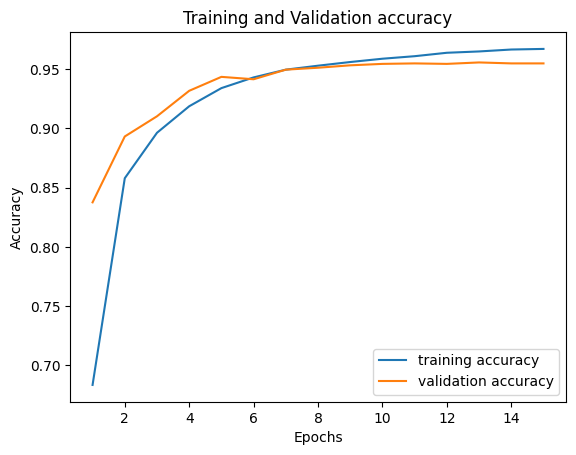

In [ ]:
from matplotlib import pyplot as plt

epochs = range(1, EPOCHS +1 )

fig, ax = plt.subplots()

ax.plot(epochs,train_accuracy_per_epoch,label ='training accuracy')
ax.plot(epochs, val_accuracy_per_epoch, label = 'validation accuracy' )
ax.set_title('Training and Validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

plt.show()

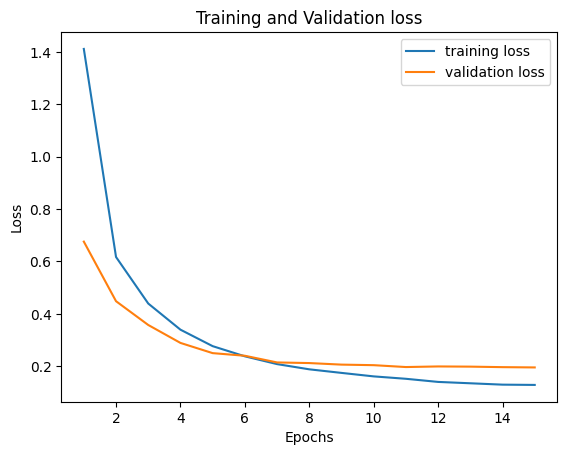

In [ ]:
fig, ax = plt.subplots()

ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.plot(epochs, val_loss_per_epoch, label = 'validation loss' )
ax.set_title('Training and Validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

plt.show()

#Análisis de Train y Validacion

## Classification Report

In [ ]:
from sklearn.metrics import classification_report
# Obtener la lista de clases únicas (sin repetir) del campo description_type
unique_classes = sorted(df_especies['description_type'].unique().tolist())

print('classifiation report')
print(classification_report(valid_pred, val_df['label'].to_numpy(), target_names=unique_classes))

classifiation report
                                precision    recall  f1-score   support

                    life_cycle       0.72      0.87      0.79        15
                     life_form       0.95      0.88      0.91        24
                 annual_cycles       0.97      0.88      0.92        32
                      behavior       0.89      0.87      0.88       105
             collecting_method       0.71      0.88      0.79        17
                  common_names       0.96      0.95      0.95       169
conservation_area_distribution       0.98      1.00      0.99       118
               cr_distribution       0.99      0.98      0.98       350
                    demography       0.00      0.00      0.00         0
                       feeding       0.96      0.96      0.96       134
              full_description       0.99      0.99      0.99       359
                       habitat       0.97      0.95      0.96       264
                   interaction       0.73 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels=None):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

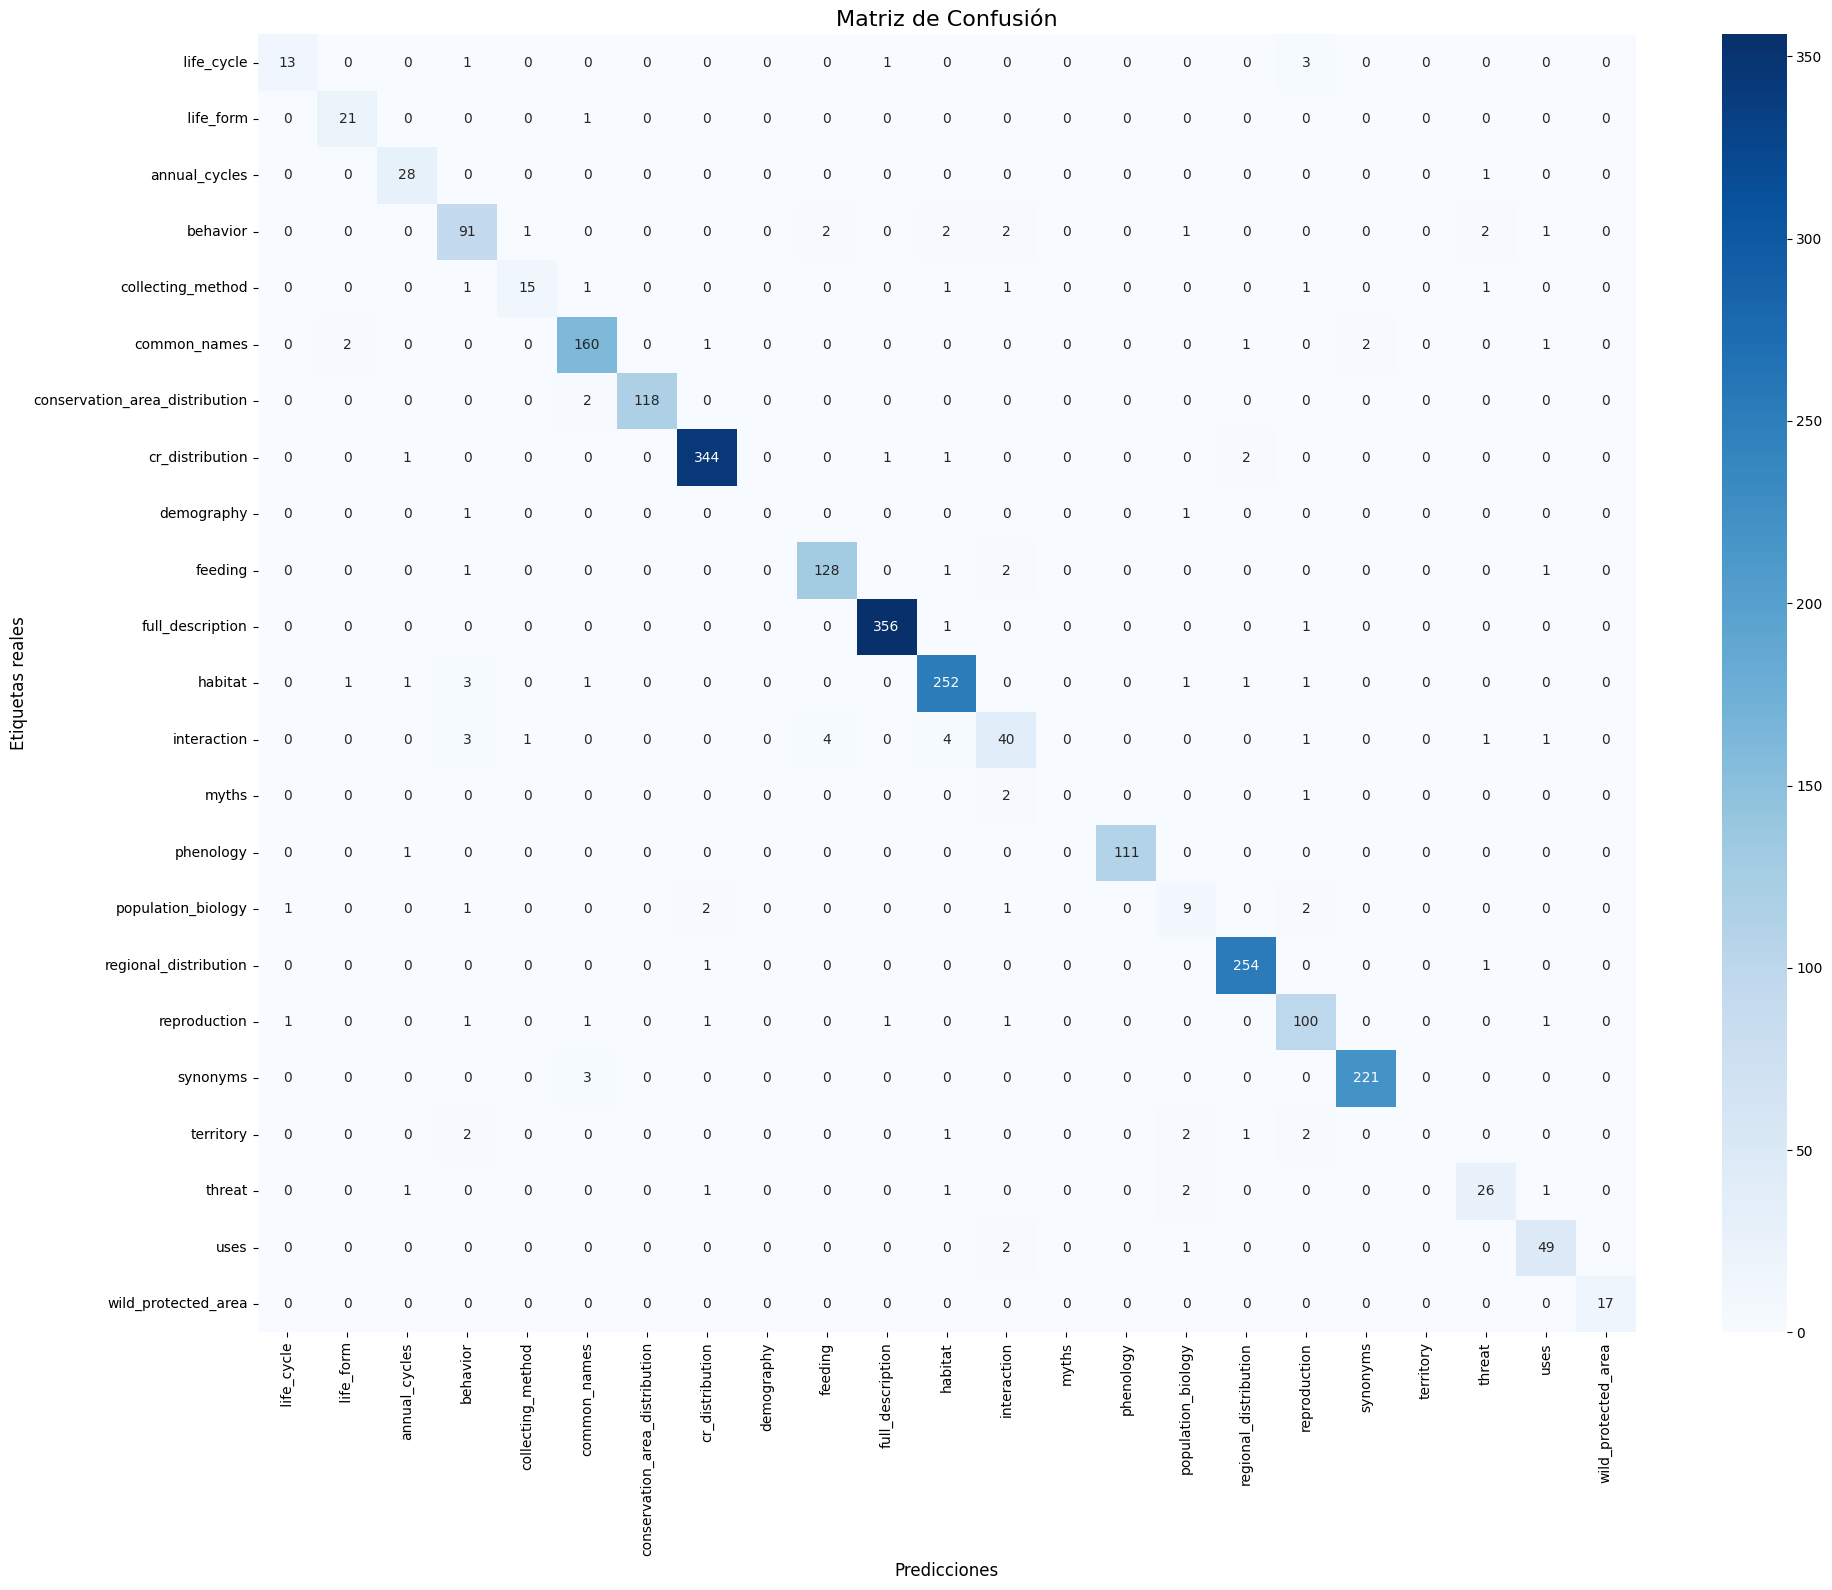

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(val_df['label'].to_numpy(), valid_pred)

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 16))

# Crear el heatmap con seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes, yticklabels=unique_classes)

# Ajustar etiquetas y título
plt.xlabel('Predicciones', fontsize=12)
plt.ylabel('Etiquetas reales', fontsize=12)
plt.title('Matriz de Confusión', fontsize=16)

# Rotar las etiquetas para mejor legibilidad
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Mostrar la figura
plt.tight_layout()
plt.show()

#Testing

In [ ]:
model.eval()
test_pred = []
test_loss= 0

with torch.no_grad():
    for step_num, batch_data in enumerate(tqdm(test_dataloader)):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        test_loss += loss.item()

        test_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))

test_pred = np.concatenate(test_pred)

  0%|          | 0/154 [00:00<?, ?it/s]

## Análisis de testing

## Reporte de la clasificación

In [ ]:
print('classifiation report')
print(classification_report(test_pred, test_df['label'].to_numpy(),target_names=unique_classes))

classifiation report
                                precision    recall  f1-score   support

                    life_cycle       0.82      1.00      0.90        14
                     life_form       0.82      0.69      0.75        26
                 annual_cycles       0.93      0.87      0.90        31
                      behavior       0.88      0.87      0.88       103
             collecting_method       0.75      0.94      0.83        16
                  common_names       0.96      0.99      0.98       164
conservation_area_distribution       0.98      1.00      0.99       118
               cr_distribution       0.99      0.98      0.98       352
                    demography       0.00      0.00      0.00         0
                       feeding       0.98      0.94      0.96       139
              full_description       1.00      1.00      1.00       359
                       habitat       0.95      0.95      0.95       264
                   interaction       0.65 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion matrix

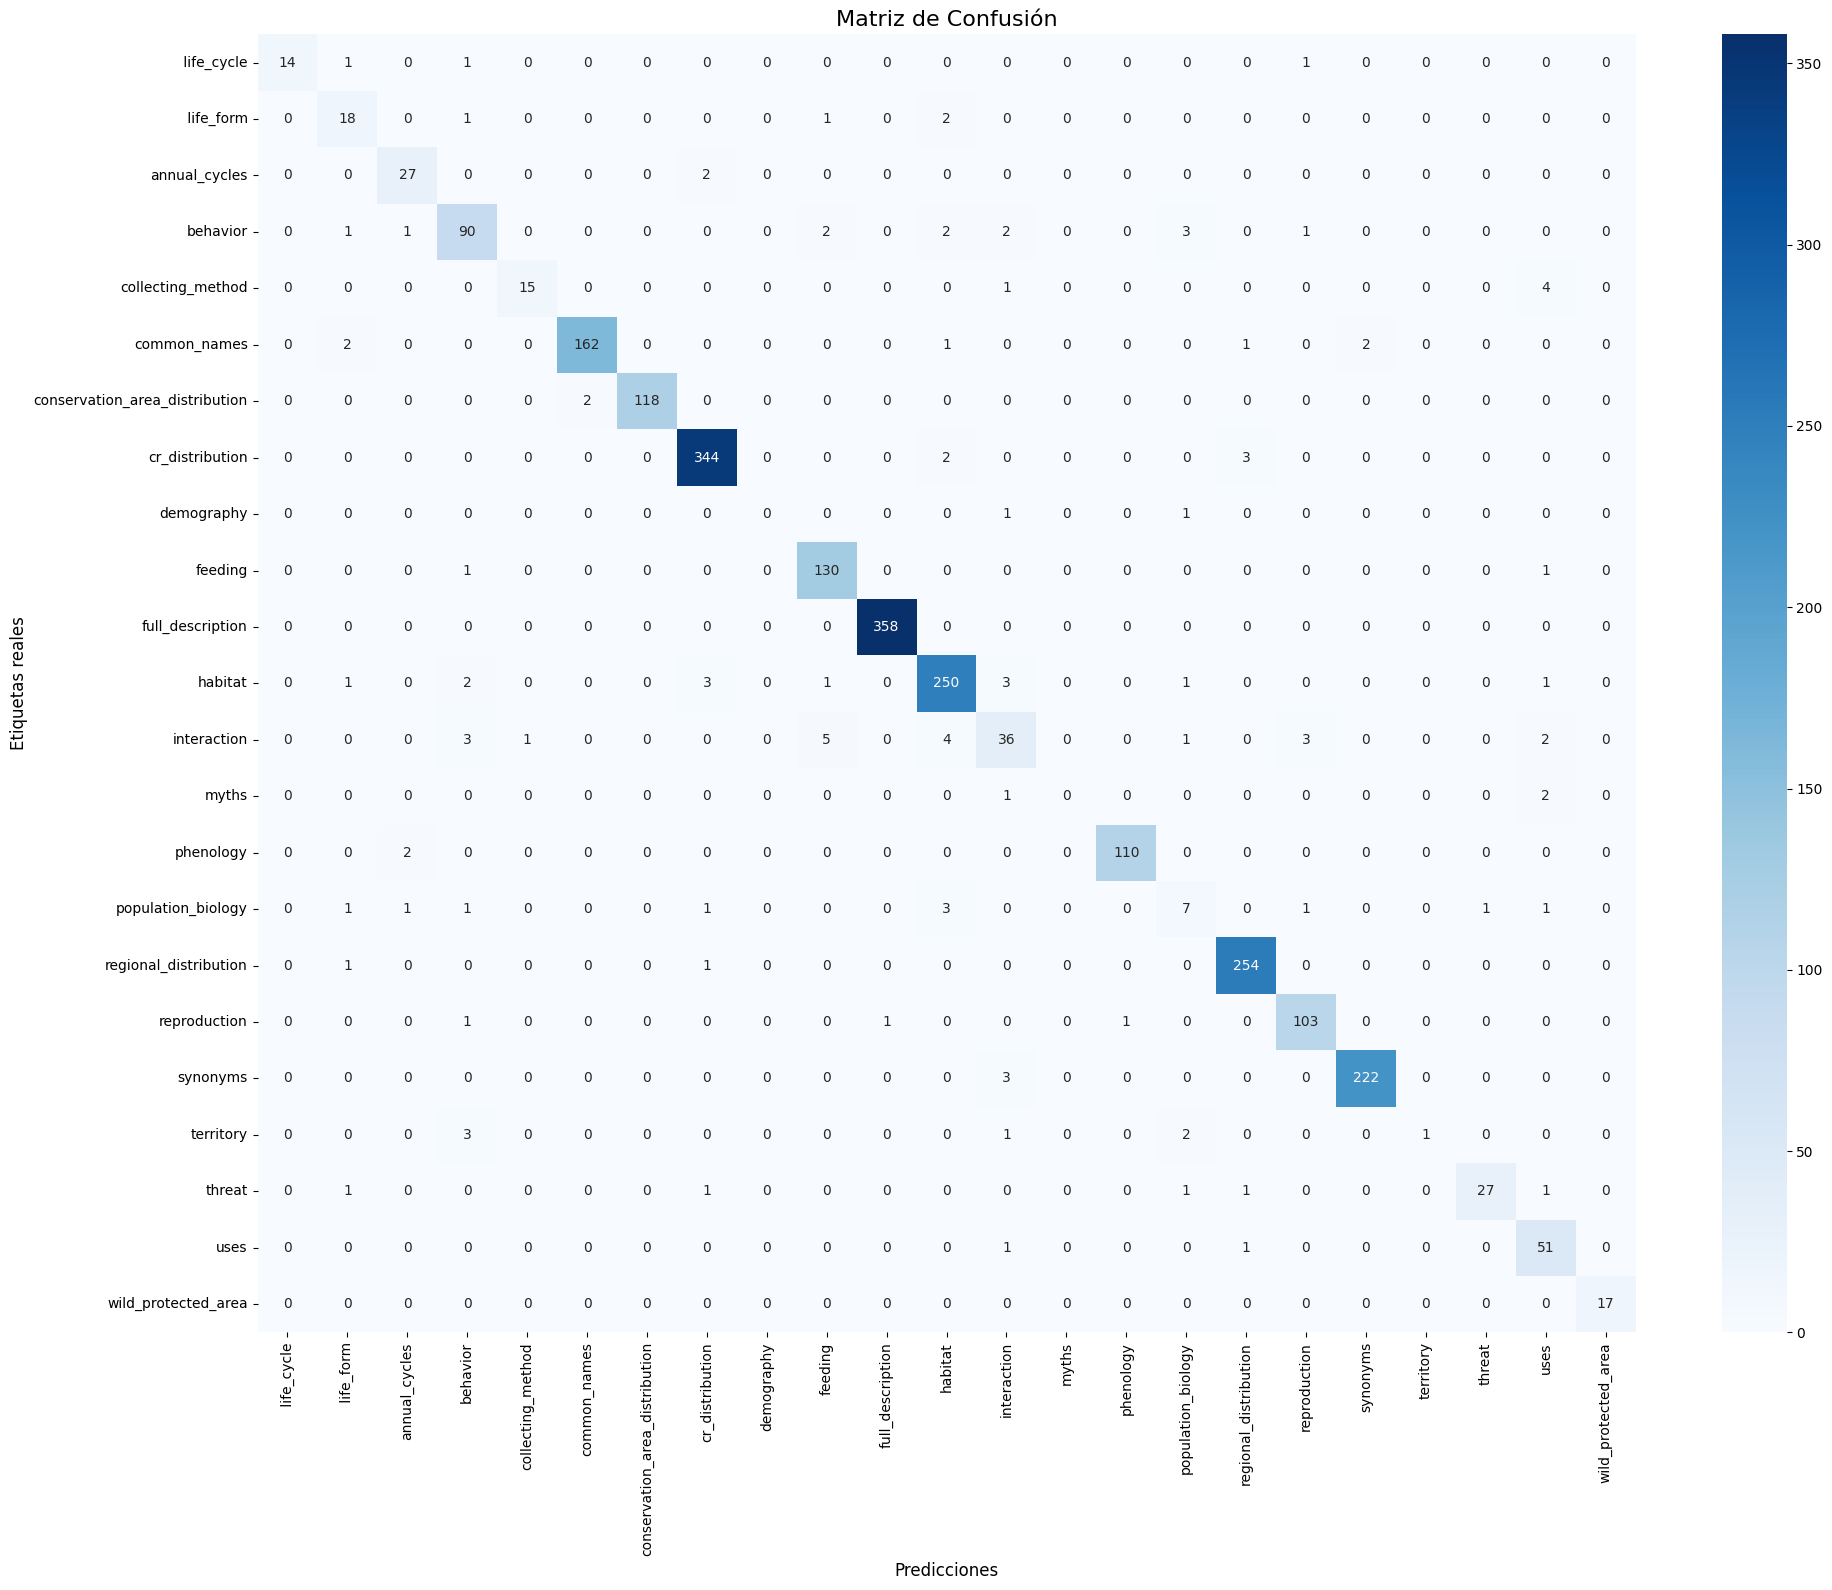

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(test_df['label'].to_numpy(), test_pred)

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 16))

# Crear el heatmap con seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes, yticklabels=unique_classes)

# Ajustar etiquetas y título
plt.xlabel('Predicciones', fontsize=12)
plt.ylabel('Etiquetas reales', fontsize=12)
plt.title(Matriz de Confusión', fontsize=16)

# Rotar las etiquetas para mejor legibilidad
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Mostrar la figura
plt.tight_layout()
plt.show()'

## Comparativa label-prediction

In [ ]:
test_df['pred'] = test_pred
test_df.reset_index(level=0)

print(test_df[test_df['label']!=test_df['pred']].shape)

test_df[test_df['label']!=test_df['pred']][['description','label','pred']].head(10)

(110, 3)


,description,label,pred
6,Puede detenerse por algunos minutos o por vari...,11,9
8,Especie encontrada en Costa Rica en el bosque ...,7,16
56,Laurus americana Mill. The Gardeners Dictionar...,5,18
57,Es un insecto muy llamativo por su forma y gra...,13,12
101,Llega a formar poblaciones densas en áreas abi...,15,1
122,Las larvas filtran materia orgánica pero tambi...,9,21
189,"Popularmente, por su color esta especie es lla...",13,21
221,La población de Costa Rica parece mantenerse l...,15,2
260,R. similis completa su ciclo de vida dentro de...,0,17
264,Muestras de suelo recolectado con distintas he...,4,21


# Testing Labels Generated with Deepseek


In [ ]:
#'/content/drive/MyDrive/Etiquetado 27 Deepseek.xlsx'

In [ ]:
path = "/content/Etiquetado 27 Deepseek.xlsx"
df_deepseek = pd.read_excel(path, engine='openpyxl')

In [ ]:
df_deepseek

,description,description_type
0,"""While apparently a representative of Sporophi...",full_description
1,"""tains immediately at its base. Mr. Underwood ...",habitat
2,"""Pachyrhamphus cinnamomeus LAWRENCE, Ann. Lyc....",synonyms
3,"""This is not an uncommon bird in the northeast...",cr_distribution
4,"""Pachyrhamphus albogriseus SCLATER, Cat. Birds...",synonyms
5,"""Pachyrhamphus albo-griseus albo-griseus RipGW...",synonyms
6,"""Pachyrhamphus ornatus CHERRIE, Proc. U. S. Na...",synonyms
7,"""d'Ã©closion fut trouvÃ© de 86%. DonnÃ©es sur ...",reproduction
8,"""pourcentage de rÃ©ussite de 60 %, dans la rep...",reproduction
9,"""Ã©lever trois nichÃ©es successives, chacune d...",interaction


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Limpieza básica: eliminar filas con descripciones vacías y duplicados exactos
df = df_deepseek.dropna(subset=['description']).drop_duplicates(subset=['description'])

# Función para mapear las etiquetas
def map_labels(row):
    original_label = row['description_type']  # Asumiendo que la columna se llama 'Etiqueta'
    return class_mapping.get(original_label, -1)  # -1 para etiquetas no mapeadas

# Aplicar el mapeo
df['label'] = df.apply(map_labels, axis=1)

# Filtrar solo las clases existentes en el mapeo original
df_mapped = df[df['label'] != -1].copy()

# Guardar resultado
df_mapped.to_excel('/content/Etiquetado_27_Mapeado.xlsx', index=False)

print("Mapeo completado")
print("Distribución de clases:")
print(df_mapped['label'].value_counts())

Mapeo completado
Distribución de clases:
label
18    10
16     6
17     4
10     3
11     2
7      1
12     1
Name: count, dtype: int64


In [ ]:
test_deep_inputs_ids, test_deep_attention_mask = encode(df_mapped["description"].values.tolist())

In [ ]:
test_data_deep = TensorDataset(test_deep_inputs_ids, test_deep_attention_mask, torch.tensor(df_mapped["label"].values))
test_sampler_deep = SequentialSampler(test_data_deep)
test_dataloader_deep = DataLoader(test_data_deep, sampler=test_sampler_deep, batch_size=1)

In [ ]:
model.load_state_dict(torch.load('/content/best_model.pth'))
model.to(device)
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [ ]:
test_pred_deep = []
test_loss_deep= 0

with torch.no_grad():
    for step_num, batch_data in enumerate(tqdm(test_dataloader_deep)):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        test_loss_deep += loss.item()

        test_pred_deep.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))

test_pred_deep = np.concatenate(test_pred_deep)

  0%|          | 0/27 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import classification_report
# Obtener la lista de clases únicas (sin repetir) del campo description_type
unique_classes = sorted(df_mapped["description_type"].unique().tolist())

In [ ]:
print('classifiation report')
print(classification_report(test_pred_deep, df_mapped["label"].to_numpy()))

classifiation report
              precision    recall  f1-score   support

           7       1.00      0.33      0.50         3
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          16       0.17      1.00      0.29         1
          17       0.00      0.00      0.00         0
          18       1.00      0.67      0.80        15
          20       0.00      0.00      0.00         4

    accuracy                           0.56        27
   macro avg       0.52      0.50      0.45        27
weighted avg       0.78      0.56      0.62        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

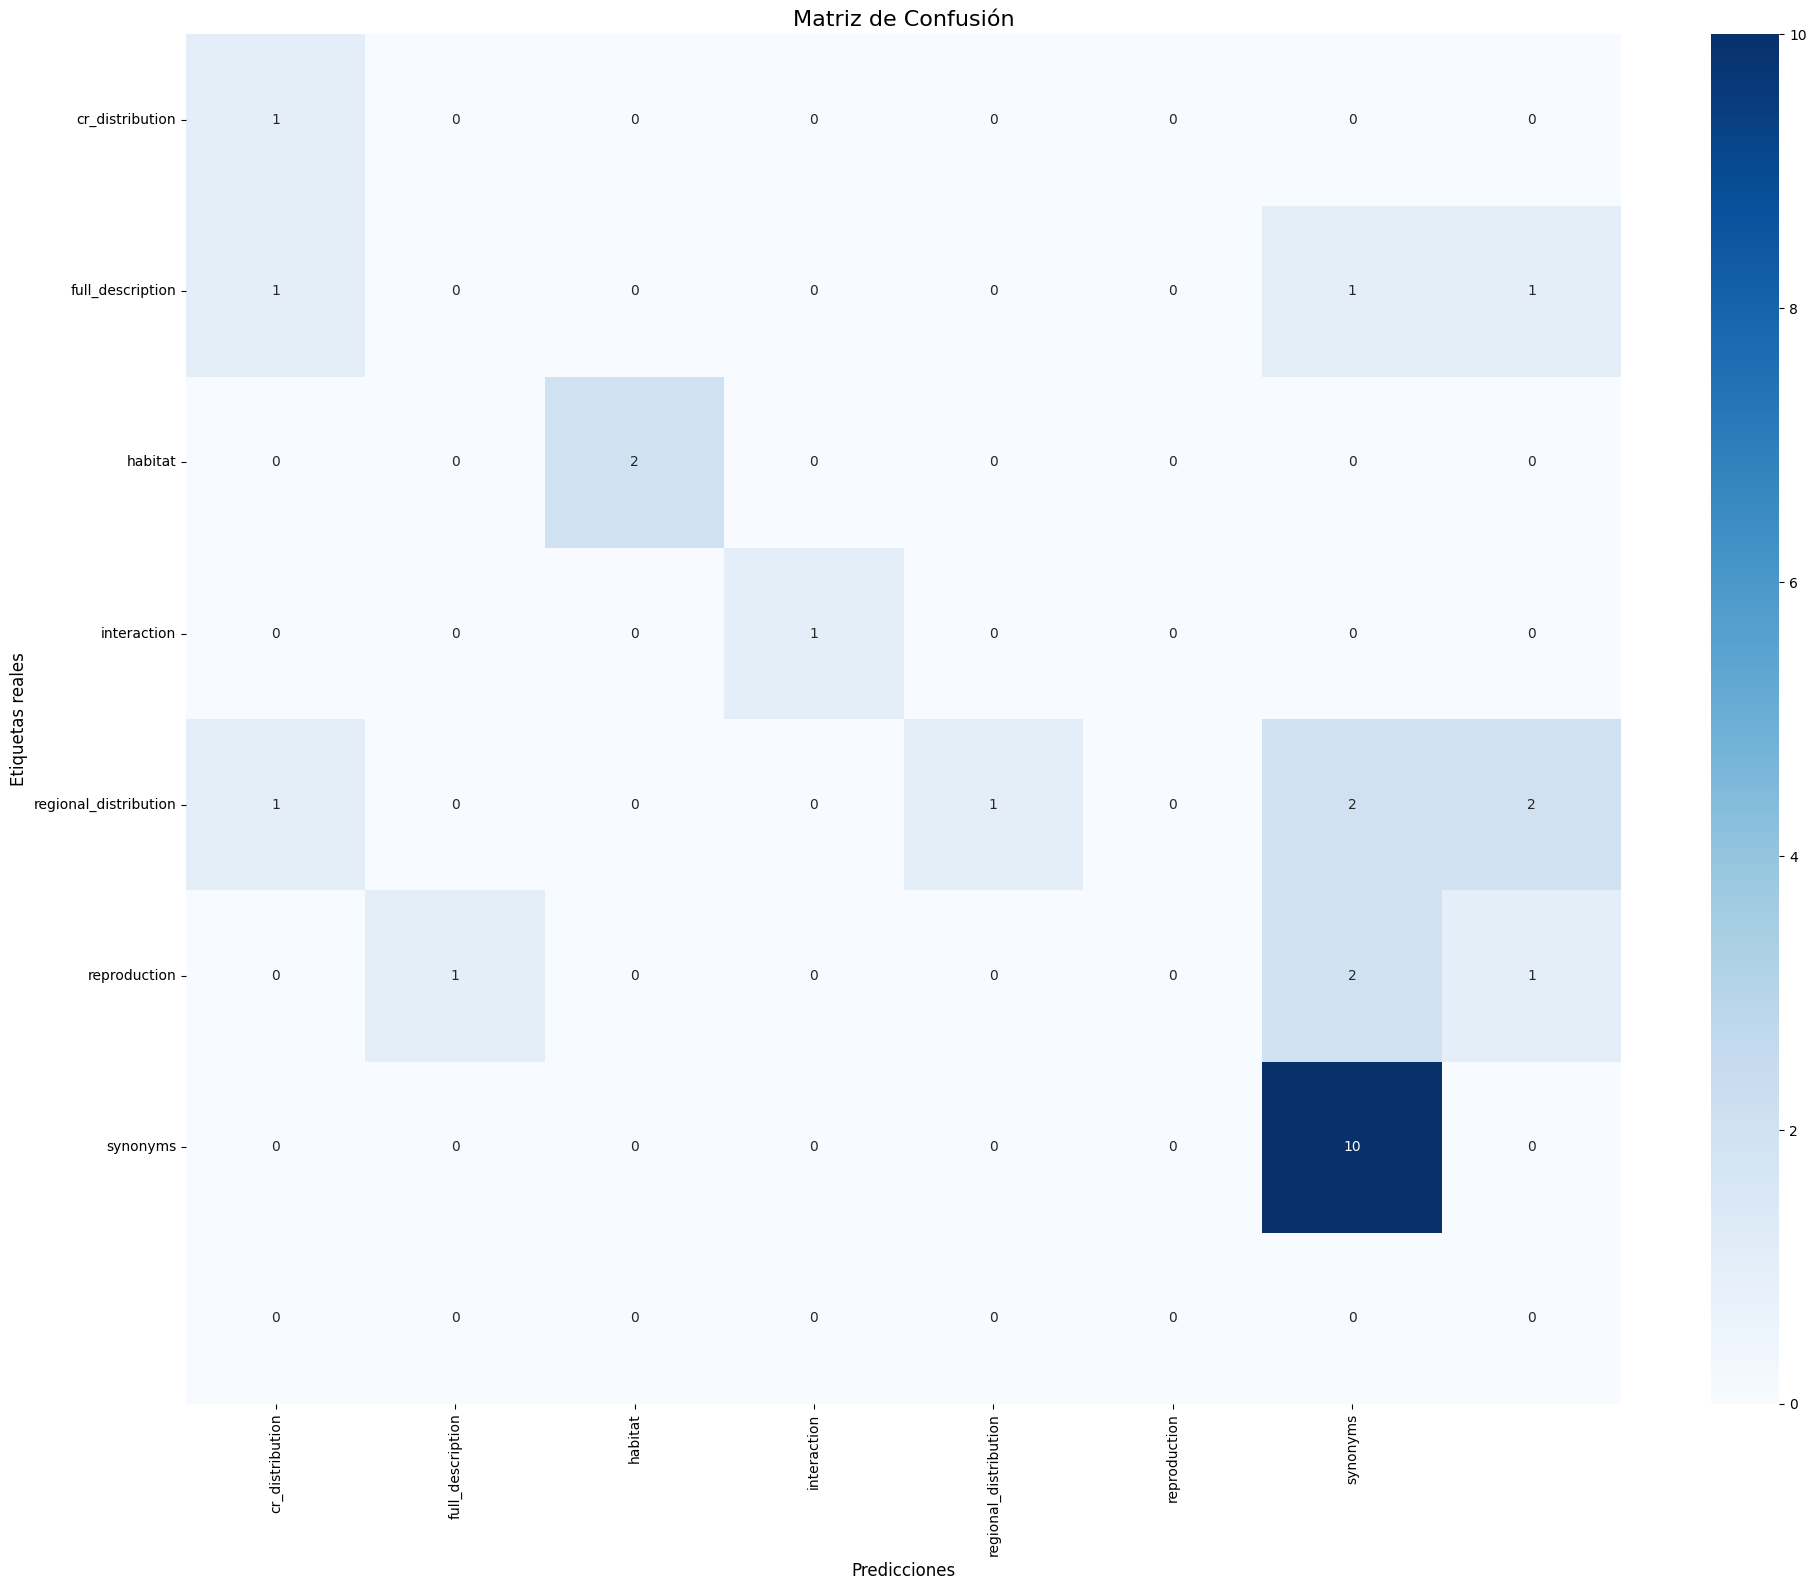

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear la matriz de confusión
cm = confusion_matrix(df_mapped["label"].to_numpy(), test_pred_deep)

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 16))

# Crear el heatmap con seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes, yticklabels=unique_classes)

# Ajustar etiquetas y título
plt.xlabel('Predicciones', fontsize=12)
plt.ylabel('Etiquetas reales', fontsize=12)
plt.title('Matriz de Confusión', fontsize=16)

# Rotar las etiquetas para mejor legibilidad
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Mostrar la figura
plt.tight_layout()
plt.show()